In [143]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\heartattac.csv")

# take a look at the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [146]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [148]:
df['output'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [149]:
print(df.corr()['output'].abs())

age         0.225439
sex         0.280937
cp          0.433798
trtbps      0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalachh    0.421741
exng        0.436757
oldpeak     0.430696
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64


In [150]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

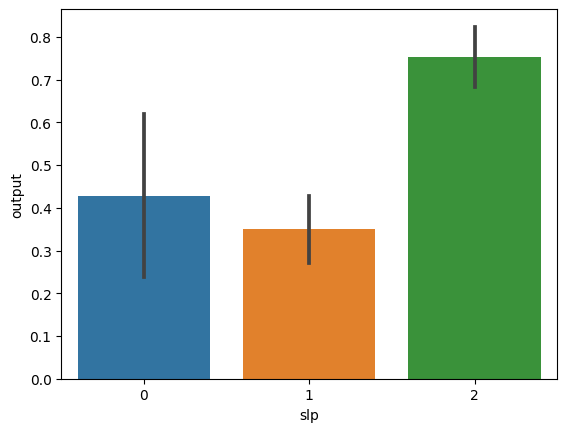

In [151]:
sns.barplot(x="slp", y="output", data = df)
plt.show()
# it depicts people with '2 slp' are in more dangreous than others

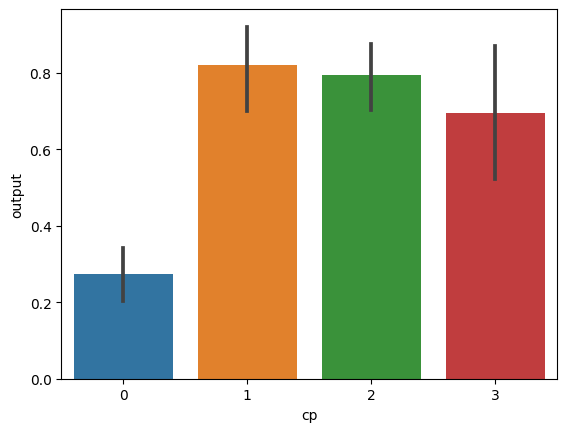

In [152]:
sns.barplot(x="cp", y="output", data = df)
plt.show()


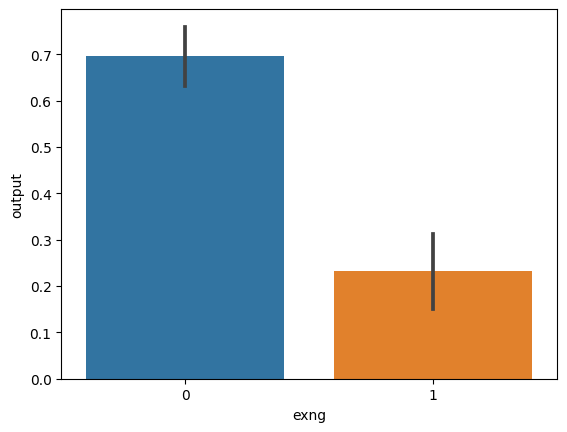

In [153]:
sns.barplot(x="exng", y="output", data = df)
plt.show()

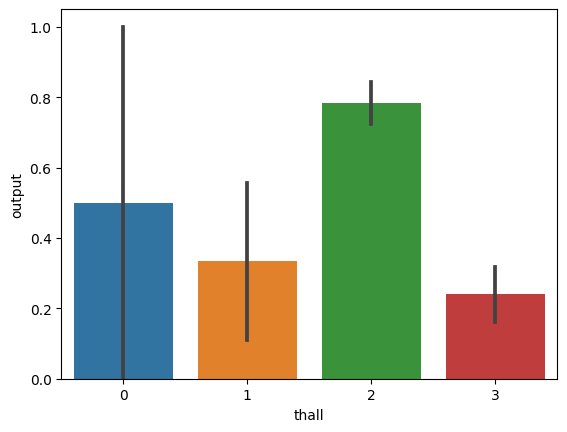

In [183]:
sns.barplot(x="thall", y="output", data = df)
plt.show()

In [190]:
feature_df = df[[ 'caa','cp','oldpeak','thalachh','slp','exng','thall']].astype('int')
X = np.asarray(feature_df)
X[0:5]

array([[  0,   3,   2, 150,   0,   0,   1],
       [  0,   2,   3, 187,   0,   0,   2],
       [  0,   1,   1, 172,   2,   0,   2],
       [  0,   1,   0, 178,   2,   0,   2],
       [  0,   0,   0, 163,   2,   1,   2]])

In [191]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.71,  1.97,  1.15,  0.02, -2.27, -0.7 , -2.15],
       [-0.71,  1.  ,  2.09,  1.63, -2.27, -0.7 , -0.51],
       [-0.71,  0.03,  0.22,  0.98,  0.98, -0.7 , -0.51],
       [-0.71,  0.03, -0.72,  1.24,  0.98, -0.7 , -0.51],
       [-0.71, -0.94, -0.72,  0.58,  0.98,  1.44, -0.51]])

In [192]:
df['output'] = df['output'].astype('int')
y = np.asarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 7) (242,)
Test set: (61, 7) (61,)


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [195]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [196]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.41, 0.59],
       [0.67, 0.33],
       [0.37, 0.63],
       [0.28, 0.72],
       [0.43, 0.57],
       [0.45, 0.55],
       [0.64, 0.36],
       [0.26, 0.74],
       [0.43, 0.57],
       [0.37, 0.63],
       [0.37, 0.63],
       [0.22, 0.78],
       [0.42, 0.58],
       [0.57, 0.43],
       [0.34, 0.66],
       [0.81, 0.19],
       [0.26, 0.74],
       [0.27, 0.73],
       [0.6 , 0.4 ],
       [0.43, 0.57],
       [0.27, 0.73],
       [0.39, 0.61],
       [0.77, 0.23],
       [0.34, 0.66],
       [0.4 , 0.6 ],
       [0.75, 0.25],
       [0.66, 0.34],
       [0.25, 0.75],
       [0.43, 0.57],
       [0.8 , 0.2 ],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.24, 0.76],
       [0.37, 0.63],
       [0.33, 0.67],
       [0.29, 0.71],
       [0.22, 0.78],
       [0.44, 0.56],
       [0.41, 0.59],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.7 , 0.3 ],
       [0.66, 0.34],
       [0.49, 0.51],
       [0.28, 0.72],
       [0.47, 0.53],
       [0.67, 0.33],
       [0.53,

In [197]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


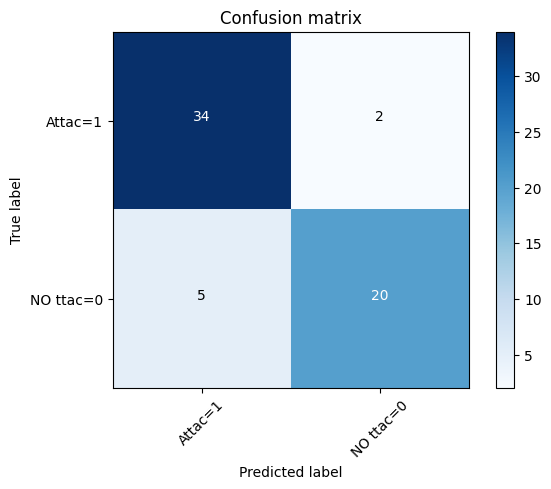

In [198]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attac=1','NO ttac=0'],normalize= False,  title='Confusion matrix')

In [199]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



## SVM :

In [200]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [201]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 1, 1, 1])

In [202]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [203]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[21  4]
 [ 4 32]]


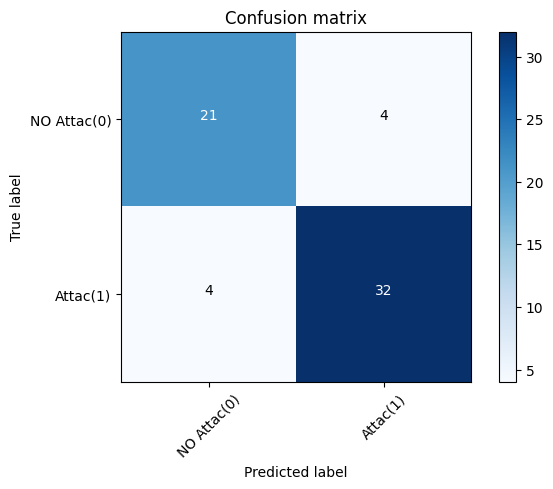

In [204]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO Attac(0)','Attac(1)'],normalize= False,  title='Confusion matrix')

In [205]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8688524590163934

In [206]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.8

## DecisionTree :

In [207]:
AttacTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
AttacTree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [208]:
AttacTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [209]:
predTree = AttacTree.predict(X_train)

In [210]:
print (predTree [0:5])
print ( y_train[0:5])


[1 1 1 0 1]
[1 1 0 0 0]


In [211]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score( y_train, predTree))

DecisionTrees's Accuracy:  0.8512396694214877
